### 1: Import Required Libraries & Load Data
- Key Concepts: Importing and handling financial datasets efficiently.

- Load stock data using yfinance or pandas from a CSV file.

- Handle missing values and clean the dataset.

- Display the first few rows to inspect the structure.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Load data
stock_data = yf.download("AAPL", start="2023-01-01", end="2025-01-01")
stock_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.632523,129.395510,122.742865,128.782641,112117500
2023-01-04,124.907700,127.181268,123.642412,125.431607,89113600
2023-01-05,123.583115,126.301508,123.326108,125.668865,80962700
2023-01-06,128.130203,128.792501,123.454572,124.561702,87754700
2023-01-09,128.654144,131.876686,128.397138,128.970474,70790800


### 2: Advanced Exploratory Data Analysis (EDA)
- Key Concepts:

- Data distributions using histograms

- Rolling statistics for trend identification

- Outlier detection using boxplots

### 2.1 Visualizing Stock Price Trends
Plot closing prices to observe trends.

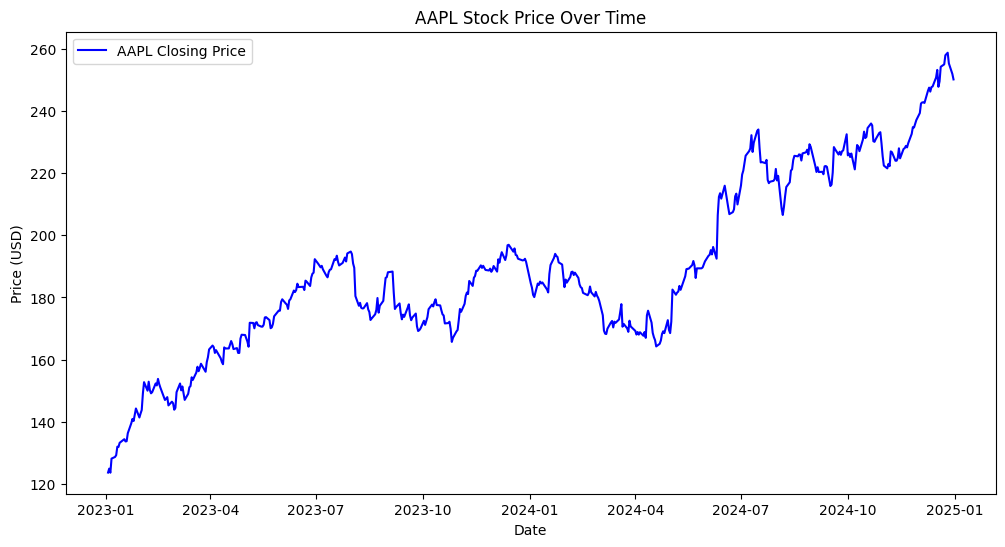

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label="AAPL Closing Price", color='blue')
plt.title("AAPL Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


### 2.2 Daily Returns Distribution
Visualize the distribution of daily returns.

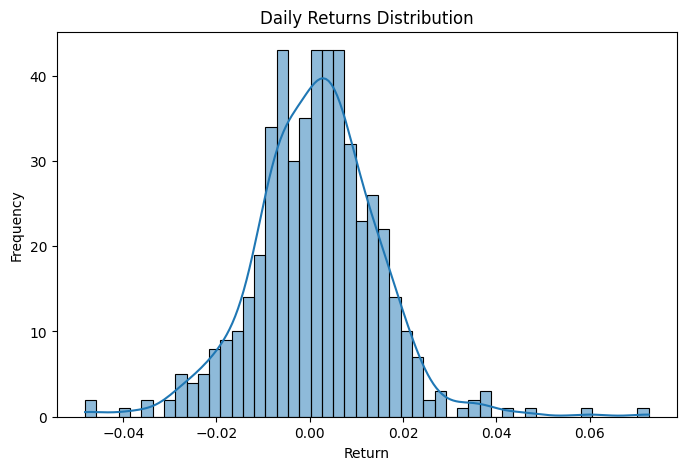

In [20]:
stock_data['Daily Return'] = stock_data['Close'].pct_change()
plt.figure(figsize=(8, 5))
sns.histplot(stock_data['Daily Return'].dropna(), bins=50, kde=True)
plt.title("Daily Returns Distribution")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.show()


### Step 3: Feature Engineering for Stock Analysis
- Key Concepts:

- Rolling averages to smooth fluctuations

- Bollinger Bands for volatility analysis

- Momentum indicators to identify trends

### 3.1 Moving Averages (MA50 & MA200)
Calculate short-term (50-day) and long-term (200-day) moving averages.

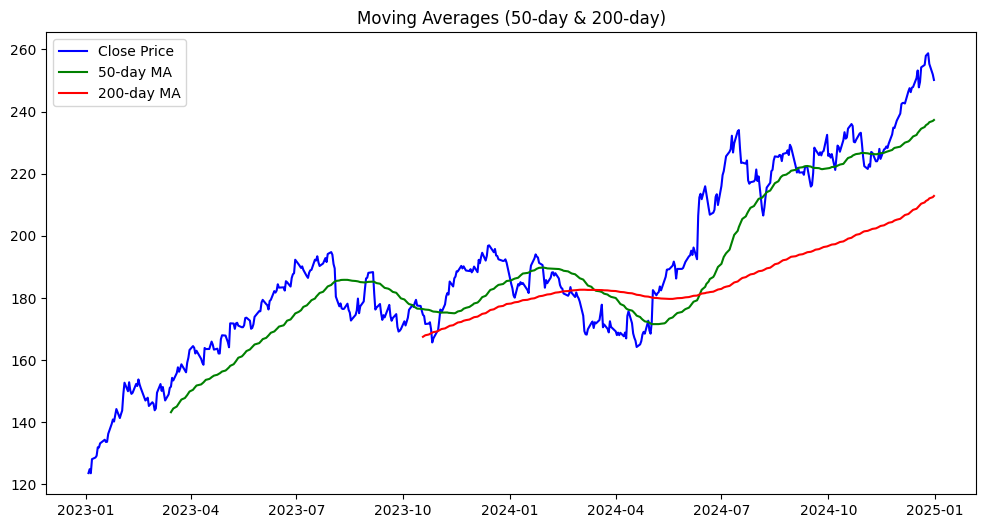

In [21]:
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label="Close Price", color='blue')
plt.plot(stock_data['MA50'], label="50-day MA", color='green')
plt.plot(stock_data['MA200'], label="200-day MA", color='red')
plt.title("Moving Averages (50-day & 200-day)")
plt.legend()
plt.show()


### 3.2 Bollinger Bands (Volatility Indicator)
Calculate Upper & Lower Bollinger Bands.

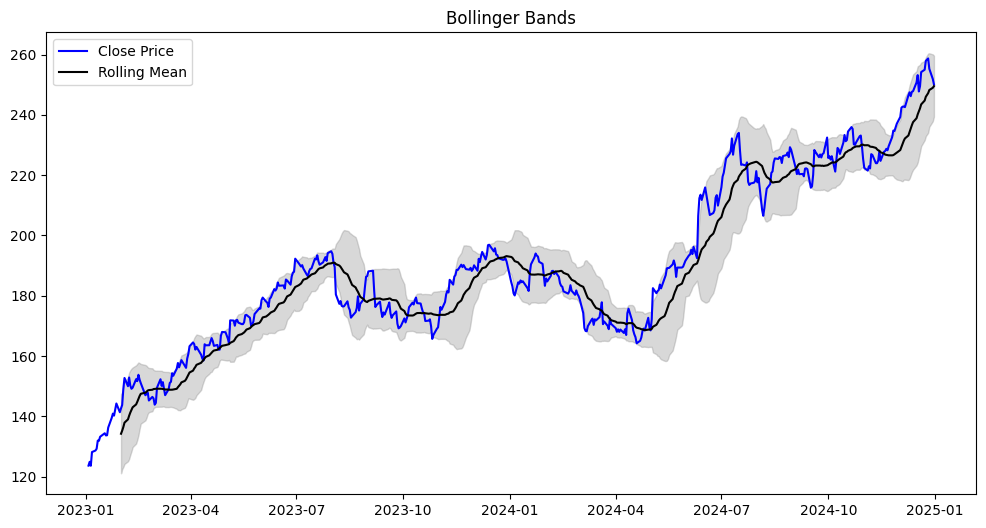

In [22]:
stock_data['Rolling Mean'] = stock_data['Close'].rolling(window=20).mean()
stock_data['Rolling Std'] = stock_data['Close'].rolling(window=20).std()
stock_data['Upper Band'] = stock_data['Rolling Mean'] + (2 * stock_data['Rolling Std'])
stock_data['Lower Band'] = stock_data['Rolling Mean'] - (2 * stock_data['Rolling Std'])

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label="Close Price", color='blue')
plt.plot(stock_data['Rolling Mean'], label="Rolling Mean", color='black')
plt.fill_between(stock_data.index, stock_data['Upper Band'], stock_data['Lower Band'], color='gray', alpha=0.3)
plt.title("Bollinger Bands")
plt.legend()
plt.show()


### Step 4: Correlation Analysis
- Key Concepts:

- Checking relationships between stock prices and technical indicators

- Using a heatmap for correlation visualization

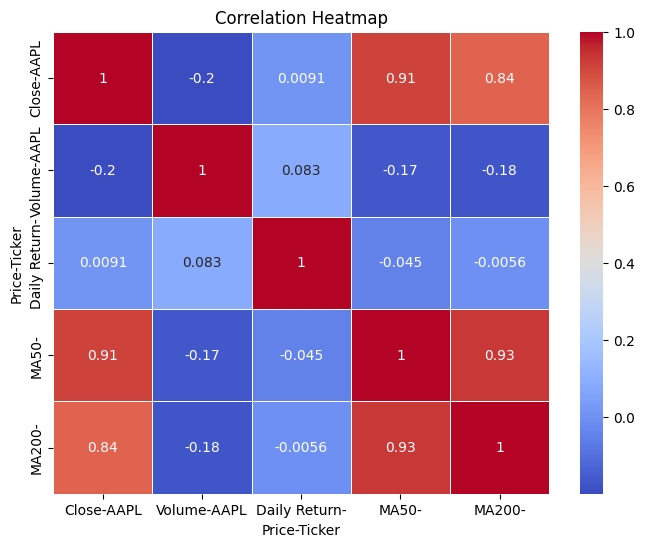

In [23]:
corr_matrix = stock_data[['Close', 'Volume', 'Daily Return', 'MA50', 'MA200']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Step 5: Feature Scaling (Preparation for ML)
- Key Concepts:

- Standardizing features for machine learning

- Ensuring numerical stability in models

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(stock_data[['Close', 'Volume', 'Daily Return', 'MA50', 'MA200']])
scaled_df = pd.DataFrame(scaled_features, columns=['Close', 'Volume', 'Daily Return', 'MA50', 'MA200'])
scaled_df.head()


,Close,Volume,Daily Return,MA50,MA200
0,-2.315520,2.144090,NaN,NaN,NaN
1,-2.270273,1.229857,0.656069,NaN,NaN
2,-2.317274,0.905920,-0.900553,NaN,NaN
3,-2.155928,1.175851,2.626482,NaN,NaN
4,-2.137336,0.501663,0.192841,NaN,NaN
